In [20]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

#### Задание 1

In [23]:
data = {
    'холодно': [1, 0, 0, 1, 0],
    'солнце': [0, 0, 1, 1, 0],
    'идти': [0, 1, 1, 1, 1]
}
df = pd.DataFrame(data)
X = df[['холодно', 'солнце']]
y = df['идти']

In [24]:
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

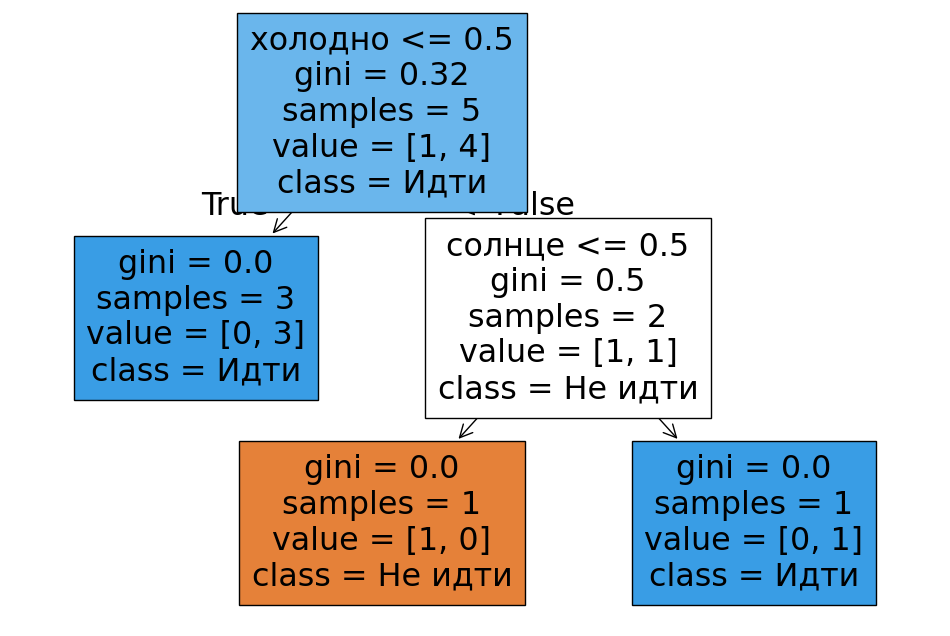

In [25]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, feature_names=['холодно', 'солнце', 'светит'], class_names=['Не идти', 'Идти'])
plt.show()

- Глубина дерева равна 2
- Критерий gini в исходной выборке равен 0.32

#### Задание 2

In [26]:
importance = clf.feature_importances_
print("Важность признаков:", importance)

Важность признаков: [0.375 0.625]


#### Задание 3

In [6]:
df = pd.read_csv("D:\\ds\\light_music.csv")

In [ ]:
X = df.drop('popularity', axis=1) 
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("Размер обучающей выборки (X_train):", X_train.shape)
print("Размер тестовой выборки (X_test):", X_test.shape)

Размер обучающей выборки (X_train): (4000, 15)
Размер тестовой выборки (X_test): (1000, 15)


In [ ]:
categorical_cols = X_train.select_dtypes(include=['object']).columns

if len(categorical_cols) > 0:
    print("Найдены категориальные признаки:", categorical_cols)
    
    encoder = OrdinalEncoder()
    X_train[categorical_cols] = encoder.fit_transform(X_train[categorical_cols])
    X_test[categorical_cols] = encoder.transform(X_test[categorical_cols])
    
    print("\nОбучающая выборка после преобразования:")
    print(X_train.head())
    print("\nТестовая выборка после преобразования:")
    print(X_test.head())
else:
    print("Категориальные строковые признаки отсутствуют.")

Найдены категориальные признаки: Index(['track_genre'], dtype='object')

Обучающая выборка после преобразования:
      duration_ms  explicit  danceability  energy  key  loudness  mode  \
1233       195456     False         0.648   0.473    0   -14.604     1   
1056       176561     False         0.723   0.809    7    -3.081     0   
1686       185474     False         0.568   0.669    2    -5.698     1   
187        205280     False         0.736   0.722   10    -5.908     0   
3840       160801     False         0.533   0.930    1    -4.208     0   

      speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
1233       0.0285       0.59800          0.917000     0.136    0.363  112.998   
1056       0.0625       0.00346          0.001230     0.565    0.274   98.007   
1686       0.0370       0.11200          0.000000     0.115    0.405  149.969   
187        0.0753       0.38400          0.000074     0.137    0.448  112.921   
3840       0.0885       0.36500      

In [15]:
model = DecisionTreeRegressor(random_state=1)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 899.3786557955538


- Модель переобучена на обучающем наборе данных, необходимо уменьшить глубину дерева.

In [ ]:
best_mse = float('inf')
best_depth = 1

for depth in range(1, 26):
    model = DecisionTreeRegressor(max_depth=depth, random_state=1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    if mse < best_mse:
        best_mse = mse
        best_depth = depth

    print(f"Глубина: {depth}, MSE: {mse:.2f}")

print("\nЛучшая глубина дерева:", best_depth)
print("Лучшее значение MSE:", round(best_mse, 2))

Глубина: 1, MSE: 815.29
Глубина: 2, MSE: 797.68
Глубина: 3, MSE: 754.03
Глубина: 4, MSE: 731.23
Глубина: 5, MSE: 732.23
Глубина: 6, MSE: 726.98
Глубина: 7, MSE: 734.56
Глубина: 8, MSE: 717.15
Глубина: 9, MSE: 713.42
Глубина: 10, MSE: 705.91
Глубина: 11, MSE: 741.30
Глубина: 12, MSE: 790.37
Глубина: 13, MSE: 817.81
Глубина: 14, MSE: 802.64
Глубина: 15, MSE: 826.14
Глубина: 16, MSE: 867.94
Глубина: 17, MSE: 863.55
Глубина: 18, MSE: 902.10
Глубина: 19, MSE: 898.53
Глубина: 20, MSE: 945.68
Глубина: 21, MSE: 894.68
Глубина: 22, MSE: 904.67
Глубина: 23, MSE: 918.01
Глубина: 24, MSE: 918.69
Глубина: 25, MSE: 916.23

Лучшая глубина дерева: 10
Лучшее значение MSE: 705.91


Модель регрессии обучилась крайне плохо на датасете, давайте перейдем к задаче бинарной классификации (популярная песня/не популярная песня), для этого нужно перевести целевой признак `popularity` в бинарный вид: 
- Если признак `popularity` больше 50 - 1 класс
- Если признак `popularity` меньше или равен 50 - 0 класс 

Работайте с выборками после разбиения на обучение и тест и создайте переменные y_train_bin и y_test_bin.

Посчитайте соотношение классов на обучающей и тестовой выборках и укажите эти значения

In [ ]:
y_train_bin = (y_train > 50).astype(int)
y_test_bin = (y_test > 50).astype(int)

class_ratio_train = y_train_bin.value_counts(normalize=True)
print("Соотношение классов на обучающей выборке:")
print(class_ratio_train)

class_ratio_test = y_test_bin.value_counts(normalize=True)
print("\nСоотношение классов на тестовой выборке:")
print(class_ratio_test)

Соотношение классов на обучающей выборке:
popularity
0    0.59325
1    0.40675
Name: proportion, dtype: float64

Соотношение классов на тестовой выборке:
popularity
0    0.599
1    0.401
Name: proportion, dtype: float64


Обучите дерево решений для задачи бинарной классификации с фиксированным `random_state=1`, измените только глубину дерева в диапазоне от 1 до 25, чтобы метрика accuracy на тесте была самая лучшая.

Какая метрика accuracy на тесте у вас получилась?

In [ ]:
best_accuracy = 0
best_depth = 1

for depth in range(1, 26):
    model = DecisionTreeClassifier(max_depth=depth, random_state=1)
    model.fit(X_train, y_train_bin)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test_bin, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth

    print(f"Глубина: {depth}, Accuracy: {accuracy:.4f}")

print("\nЛучшая глубина дерева:", best_depth)
print("Лучшее значение Accuracy:", round(best_accuracy, 4))

Глубина: 1, Accuracy: 0.5990
Глубина: 2, Accuracy: 0.6750
Глубина: 3, Accuracy: 0.6750
Глубина: 4, Accuracy: 0.6510
Глубина: 5, Accuracy: 0.6650
Глубина: 6, Accuracy: 0.6500
Глубина: 7, Accuracy: 0.6810
Глубина: 8, Accuracy: 0.6770
Глубина: 9, Accuracy: 0.6780
Глубина: 10, Accuracy: 0.6900
Глубина: 11, Accuracy: 0.6910
Глубина: 12, Accuracy: 0.6760
Глубина: 13, Accuracy: 0.6800
Глубина: 14, Accuracy: 0.6920
Глубина: 15, Accuracy: 0.6870
Глубина: 16, Accuracy: 0.6870
Глубина: 17, Accuracy: 0.6890
Глубина: 18, Accuracy: 0.6910
Глубина: 19, Accuracy: 0.6950
Глубина: 20, Accuracy: 0.6930
Глубина: 21, Accuracy: 0.6970
Глубина: 22, Accuracy: 0.6850
Глубина: 23, Accuracy: 0.6950
Глубина: 24, Accuracy: 0.6960
Глубина: 25, Accuracy: 0.6900

Лучшая глубина дерева: 21
Лучшее значение Accuracy: 0.697


In [ ]:
feature_importances = model.feature_importances_

for feature_name, importance in zip(X_train.columns, feature_importances):
    print(f"Признак: {feature_name}, Важность: {importance:.4f}")

Признак: duration_ms, Важность: 0.0892
Признак: explicit, Важность: 0.0114
Признак: danceability, Важность: 0.0597
Признак: energy, Важность: 0.0805
Признак: key, Важность: 0.0414
Признак: loudness, Важность: 0.0978
Признак: mode, Важность: 0.0061
Признак: speechiness, Важность: 0.0869
Признак: acousticness, Важность: 0.0960
Признак: instrumentalness, Важность: 0.0667
Признак: liveness, Важность: 0.0789
Признак: valence, Важность: 0.1103
Признак: tempo, Важность: 0.0748
Признак: time_signature, Важность: 0.0095
Признак: track_genre, Важность: 0.0906


- Признак duration_ms полезней, чем признак danceability
- Признак valence один из самых полезных признаков